<h1>B09705039_劉惟恩_HW03

In [1]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

<h2>Problem 14.9

<h3>(a)

In [2]:
# 讀取資料集
df1 = pd.read_excel('Xr14-09.xlsx')

# 簡單看一下資料集的樣子
# 如果這是你第一次使用這個資料集，使用Excel開啟資料集，並確認程式讀到的跟你在Excel中看到的一樣
print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,School A,School B,School C,School D
0,81.5,64.6,56.5,53.1
1,61.8,67.0,61.7,64.8
2,61.0,61.1,53.3,65.3
3,62.4,61.1,68.0,72.1
4,58.1,77.6,65.4,55.1


Tail of dataset:


,School A,School B,School C,School D
21,NaN,69.1,NaN,NaN
22,NaN,63.6,NaN,NaN
23,NaN,63.1,NaN,NaN
24,NaN,62.7,NaN,NaN
25,NaN,55.6,NaN,NaN


In [3]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df1 = df1.rename(columns={'School A': 'grade_A', "School B": "grade_B", "School C": "grade_C", "School D ": "grade_D"})
# 需要一個ID欄位
df1["id"] = df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df2 = pd.wide_to_long(df1, ["grade"], sep="_", suffix='\w+', i="id", j="school").reset_index()
df2 = df2.dropna(subset=['grade'])

print("Head of data")
display(df2.head())
print("Tail of data")
display(df2.tail())

Head of data


,id,school,grade
0,0,A,81.5
1,1,A,61.8
2,2,A,61.0
3,3,A,62.4
4,4,A,58.1


Tail of data


,id,school,grade
92,14,D,68.2
93,15,D,47.2
94,16,D,70.0
95,17,D,65.5
96,18,D,62.6


Let $\mu_i$ (1 ~ 4) be the average grade in school A ~ D, 

$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$ <br>
$H_1$: At least two means differ

In [4]:
results = smf.ols('grade ~ C(school)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(school),430.950555,3.0,2.833578,0.043693
Residual,3903.567470,77.0,NaN,NaN


Since p-value = 0.043693 < 0.05, there is sufficient evidence to reject $H_0$ in favor of $H_1$, which implies that at least one of the mean grade is different from the others.

We can conclude that there are differences in grading standards between the four high schools.

<h3>(b)

The required conditions for the test conducted in part (a) are:
1. The populations are all normally distributed.
2. The variances of all the populations tested are equal.
3. The observations must be independent. (It is trivial in most cases.)

<h3>(c)

<h4>Check if the populations are all normally distributed, by Shapiro-Wilk test.

Null Hypothesis: The distribution is normal. <br>
Alternative Hypothesis: The distribution is not normal.

In [5]:
stat, p = stats.shapiro(df2['grade'][df2['school'] == 'A'])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9337, p=0.1816


In [6]:
stat, p = stats.shapiro(df2['grade'][df2['school'] == 'B'])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9493, p=0.2230


In [7]:
stat, p = stats.shapiro(df2['grade'][df2['school'] == 'C'])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9427, p=0.3832


In [8]:
stat, p = stats.shapiro(df2['grade'][df2['school'] == 'D'])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9268, p=0.1513


They all favor null hypothesis (p > 0.05). Thus, the populations are all normally distributed.

<h4>Check if the variances of all the populations tested are equal, by Bartlett’s Test test.

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 = \sigma_4^2$ <br>
$H_1$: At least two variances are different

In [9]:
stats.bartlett(df2['grade'][df2['school'] == 'A'], 
               df2['grade'][df2['school'] == 'B'], 
               df2['grade'][df2['school'] == 'C'],
               df2['grade'][df2['school'] == 'D'])

BartlettResult(statistic=1.5567762329633077, pvalue=0.6692297337743607)

They all favor null hypothesis (p > 0.05). Thus, the variances of all the populations tested are equal.

<h4> The required conditions of the test in part (a) are satisfied.

<h2>Problem 14.17

In [10]:
# 讀取資料集
df1 = pd.read_excel('Xr14-17.xlsx')

# 簡單看一下資料集的樣子
# 如果這是你第一次使用這個資料集，使用Excel開啟資料集，並確認程式讀到的跟你在Excel中看到的一樣
print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

s_df1 = df1.iloc[:, :3]
n_df1 = df1.iloc[:, 3:6]

Head of dataset:


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Size-Group 1,Size-Group 2,Size-Group 3,Nicotine-Group 1,Nicotine-Group 2,Nicotine-Group 3
0,15.43,13.50,11.17,18.34,18.17,4.87
1,37.34,25.73,10.90,17.26,13.10,13.64
2,25.98,22.90,21.09,11.26,15.29,12.56
3,20.44,33.02,10.52,20.09,14.44,10.66
4,18.76,34.46,22.65,13.71,15.35,7.72


Tail of dataset:


,Size-Group 1,Size-Group 2,Size-Group 3,Nicotine-Group 1,Nicotine-Group 2,Nicotine-Group 3
45,27.96,25.60,15.21,17.83,14.46,11.37
46,21.10,12.70,27.89,19.75,14.49,9.02
47,27.92,21.56,24.56,17.42,13.91,11.97
48,32.14,24.61,28.16,15.04,12.07,11.05
49,39.55,27.52,19.78,14.94,14.06,11.20


<h3>(a)

In [11]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
s_df1 = s_df1.rename(columns={'Size-Group 1': 'size_1', "Size-Group 2": "size_2", "Size-Group 3": "size_3"})
# 需要一個ID欄位
s_df1["id"] = s_df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
s_df2 = pd.wide_to_long(s_df1, ["size"], sep="_", suffix='\w+', i="id", j="group").reset_index()

print("Head of data")
display(s_df2.head())
print("Tail of data")
display(s_df2.tail())

Head of data


,id,group,size
0,0,1,15.43
1,1,1,37.34
2,2,1,25.98
3,3,1,20.44
4,4,1,18.76


Tail of data


,id,group,size
145,45,3,15.21
146,46,3,27.89
147,47,3,24.56
148,48,3,28.16
149,49,3,19.78


<h4>Check if the populations are all normally distributed, by Shapiro-Wilk test.

Null Hypothesis: The distribution is normal. <br>
Alternative Hypothesis: The distribution is not normal.

In [12]:
stat, p = stats.shapiro(s_df2['size'][s_df2['group'] == 1])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9699, p=0.2291


In [13]:
stat, p = stats.shapiro(s_df2['size'][s_df2['group'] == 2])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9785, p=0.4925


In [14]:
stat, p = stats.shapiro(s_df2['size'][s_df2['group'] == 3])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9792, p=0.5184


They all favor null hypothesis (p > 0.05). Thus, the populations are all normally distributed.

<h4>Check if the variances of all the populations tested are equal, by Bartlett’s Test test.

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$ <br>
$H_1$: At least two variances are different

In [15]:
stats.bartlett(s_df2['size'][s_df2['group'] == 1], 
               s_df2['size'][s_df2['group'] == 2], 
               s_df2['size'][s_df2['group'] == 3])

BartlettResult(statistic=2.859391024454145, pvalue=0.23938179997915682)

They all favor null hypothesis (p > 0.05). Thus, the variances of all the populations tested are equal.

<h4> The required conditions of the ANOVA test are satisfied.

<h4>ANOVA Test for mean equality

Let $\mu_i$ be the average size in group $i$, 

$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
$H_1$: At least two means differ

In [16]:
results = smf.ols('size ~ C(group)', data=s_df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(group),1270.508329,2.0,13.948698,0.000003
Residual,6694.700804,147.0,NaN,NaN


Since p-value = 0.000003 < 0.05, there is sufficient evidence to reject $H_0$ in favor of $H_1$, which implies that at least one of the mean size is different from the others.

We can conclude that the leaf sizes differ between the three groups.

<h3>(b)

In [17]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
n_df1 = n_df1.rename(columns={'Nicotine-Group 1': 'amount_1', "Nicotine-Group 2": "amount_2", "Nicotine-Group 3": "amount_3"})
# 需要一個ID欄位
n_df1["id"] = n_df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
n_df2 = pd.wide_to_long(n_df1, ["amount"], sep="_", suffix='\w+', i="id", j="group").reset_index()

print("Head of data")
display(n_df2.head())
print("Tail of data")
display(n_df2.tail())

Head of data


,id,group,amount
0,0,1,18.34
1,1,1,17.26
2,2,1,11.26
3,3,1,20.09
4,4,1,13.71


Tail of data


,id,group,amount
145,45,3,11.37
146,46,3,9.02
147,47,3,11.97
148,48,3,11.05
149,49,3,11.20


<h4>Check if the populations are all normally distributed, by Shapiro-Wilk test.

Null Hypothesis: The distribution is normal. <br>
Alternative Hypothesis: The distribution is not normal.

In [18]:
stat, p = stats.shapiro(n_df2['amount'][n_df2['group'] == 1])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9879, p=0.8849


In [19]:
stat, p = stats.shapiro(n_df2['amount'][n_df2['group'] == 2])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.8689, p=0.0001


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


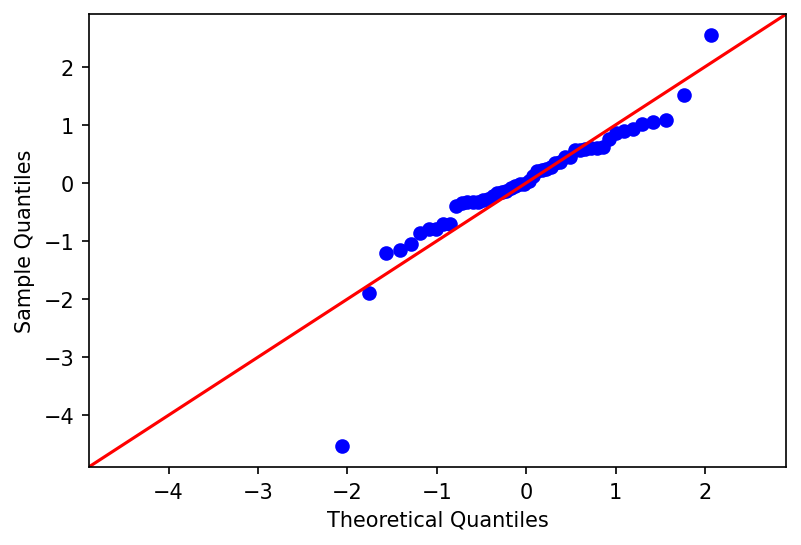

In [20]:
fig = sm.qqplot(n_df2['amount'][n_df2['group'] == 2], stats.norm, 
                fit=True, line='45')
plt.show()

In [21]:
stat, p = stats.shapiro(n_df2['amount'][n_df2['group'] == 3])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9455, p=0.0224


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


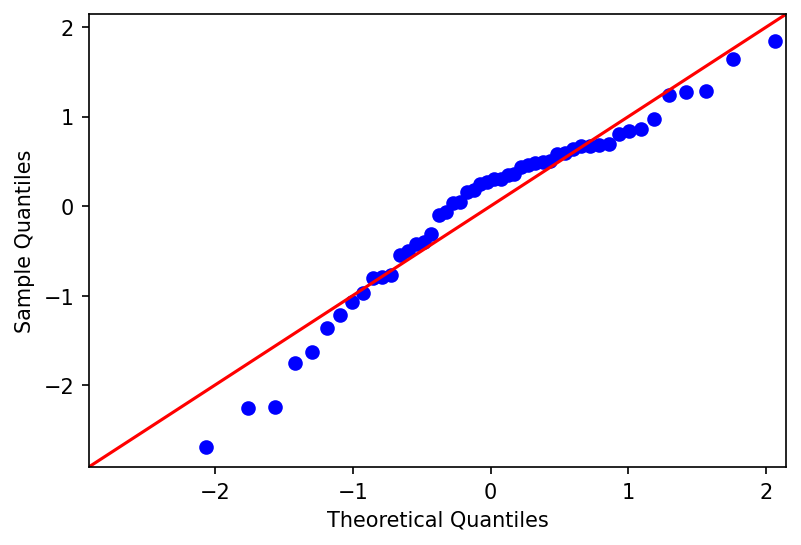

In [22]:
fig = sm.qqplot(n_df2['amount'][n_df2['group'] == 3], stats.norm, 
                fit=True, line='45')
plt.show()

The populations are all near to normally distributed.

<h4>Check if the variances of all the populations tested are equal, by Bartlett’s Test test.

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$ <br>
$H_1$: At least two variances are different

In [23]:
stats.bartlett(n_df2['amount'][n_df2['group'] == 1], 
               n_df2['amount'][n_df2['group'] == 2], 
               n_df2['amount'][n_df2['group'] == 3])

BartlettResult(statistic=0.04781076857982709, pvalue=0.9763780860936427)

They all favor null hypothesis (p > 0.05). Thus, the variances of all the populations tested are equal.

<h4> The required conditions of the ANOVA test are satisfied.

<h4>ANOVA Test for mean equality

Let $\mu_i$ be the average amounts of nicotine in group $i$, 

$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
$H_1$: At least two means differ

In [24]:
results = smf.ols('amount ~ C(group)', data=n_df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(group),753.172233,2.0,101.473928,2.058633e-28
Residual,545.540716,147.0,NaN,NaN


Since p-value = 2.058633e-28 < 0.05, there is sufficient evidence to reject $H_0$ in favor of $H_1$, which implies that at least one of the mean amounts of nicotine is different from the others.

We can conclude that the amounts of nicotine differ in the three groups.

<h2>Problem 14.22

In [25]:
# 讀取資料集
df1 = pd.read_excel('Xr14-22.xlsx')

# 簡單看一下資料集的樣子
# 如果這是你第一次使用這個資料集，使用Excel開啟資料集，並確認程式讀到的跟你在Excel中看到的一樣
print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

r_df1 = df1.iloc[:, :3]
m_df1 = df1.iloc[:, 3:6]
s_df1 = df1.iloc[:, 6:9]

Head of dataset:


,US Reading,Canada Reading,UK Reading,US Math,Canada Math,UK Math,US Science,Canada Science,UK Science
0,500,552.0,509.0,494,530.0,505.0,488,526.0,518.0
1,481,468.0,452.0,456,562.0,527.0,501,547.0,519.0
2,503,494.0,504.0,485,536.0,515.0,492,577.0,515.0
3,488,505.0,489.0,511,523.0,559.0,486,536.0,599.0
4,468,524.0,462.0,499,597.0,445.0,518,500.0,523.0


Tail of dataset:


,US Reading,Canada Reading,UK Reading,US Math,Canada Math,UK Math,US Science,Canada Science,UK Science
619,518,NaN,NaN,489,NaN,NaN,527,NaN,NaN
620,464,NaN,NaN,492,NaN,NaN,497,NaN,NaN
621,500,NaN,NaN,485,NaN,NaN,513,NaN,NaN
622,498,NaN,NaN,500,NaN,NaN,503,NaN,NaN
623,482,NaN,NaN,463,NaN,NaN,483,NaN,NaN


<h2>Reading

In [26]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
r_df1 = r_df1.rename(columns={'US Reading': 'score_1', "Canada Reading": "score_2", "UK Reading": "score_3"})
# 需要一個ID欄位
r_df1["id"] = r_df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
r_df2 = pd.wide_to_long(r_df1, ["score"], sep="_", suffix='\w+', i="id", j="country").reset_index()
r_df2 = r_df2.dropna(subset=['score'])

print("Head of data")
display(r_df2.head())
print("Tail of data")
display(r_df2.tail())

Head of data


,id,country,score
0,0,1,500.0
1,1,1,481.0
2,2,1,503.0
3,3,1,488.0
4,4,1,468.0


Tail of data


,id,country,score
1741,493,3,455.0
1742,494,3,480.0
1743,495,3,502.0
1744,496,3,490.0
1745,497,3,486.0


<h4>Check if the populations are all normally distributed, by Shapiro-Wilk test.

Null Hypothesis: The distribution is normal. <br>
Alternative Hypothesis: The distribution is not normal.

In [27]:
stat, p = stats.shapiro(r_df2['score'][r_df2['country'] == 1])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9968, p=0.2499


In [28]:
stat, p = stats.shapiro(r_df2['score'][r_df2['country'] == 2])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9956, p=0.3163


In [29]:
stat, p = stats.shapiro(r_df2['score'][r_df2['country'] == 3])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9887, p=0.0007


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


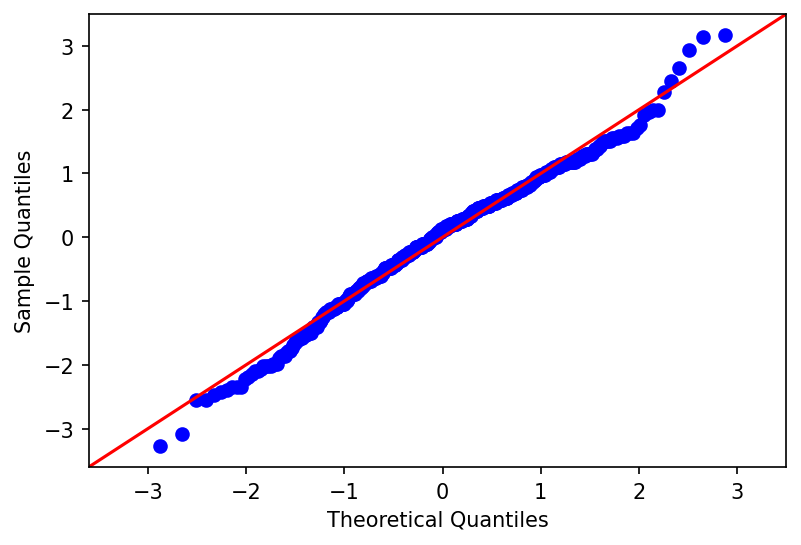

In [30]:
fig = sm.qqplot(r_df2['score'][r_df2['country'] == 3], stats.norm, 
                fit=True, line='45')
plt.show()

The populations are all normally distributed.

<h4>Check if the variances of all the populations tested are equal, by Bartlett’s Test test.

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$ <br>
$H_1$: At least two variances are different

In [31]:
stats.bartlett(r_df2['score'][r_df2['country'] == 1], 
               r_df2['score'][r_df2['country'] == 2], 
               r_df2['score'][r_df2['country'] == 3])

BartlettResult(statistic=2.1065784569498787, pvalue=0.3487886148209796)

They all favor null hypothesis (p > 0.05). Thus, the variances of all the populations tested are equal.

<h4> The required conditions of the ANOVA test are satisfied.

<h4>ANOVA Test for mean equality

Let $\mu_i$(1~3) be the average score in country US, Canada, UK, 

$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
$H_1$: At least two means differ

In [32]:
results = smf.ols('score ~ C(country)', data=r_df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(country),230055.473983,2.0,182.427052,8.969061e-72
Residual,963466.659263,1528.0,NaN,NaN


Since p-value = 8.969061e-72 < 0.05, there is sufficient evidence to reject $H_0$ in favor of $H_1$, which implies that at least one of the mean size is different from the others.

We can conclude that there are differences between the three countries.

<h2>Math

In [33]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
m_df1 = m_df1.rename(columns={'US Math': 'score_1', "Canada Math": "score_2", "UK Math": "score_3"})
# 需要一個ID欄位
m_df1["id"] = m_df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
m_df2 = pd.wide_to_long(m_df1, ["score"], sep="_", suffix='\w+', i="id", j="country").reset_index()
m_df2 = m_df2.dropna(subset=['score'])

print("Head of data")
display(m_df2.head())
print("Tail of data")
display(m_df2.tail())

Head of data


,id,country,score
0,0,1,494.0
1,1,1,456.0
2,2,1,485.0
3,3,1,511.0
4,4,1,499.0


Tail of data


,id,country,score
1741,493,3,507.0
1742,494,3,422.0
1743,495,3,472.0
1744,496,3,483.0
1745,497,3,486.0


<h4>Check if the populations are all normally distributed, by Shapiro-Wilk test.

Null Hypothesis: The distribution is normal. <br>
Alternative Hypothesis: The distribution is not normal.

In [34]:
stat, p = stats.shapiro(m_df2['score'][m_df2['country'] == 1])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9987, p=0.9339


In [35]:
stat, p = stats.shapiro(m_df2['score'][m_df2['country'] == 2])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9968, p=0.6082


In [36]:
stat, p = stats.shapiro(m_df2['score'][m_df2['country'] == 3])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9965, p=0.3462


They all favor null hypothesis (p > 0.05). Thus, the populations are all normally distributed.

<h4>Check if the variances of all the populations tested are equal, by Bartlett’s Test test.

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$ <br>
$H_1$: At least two variances are different

In [37]:
stats.bartlett(m_df2['score'][m_df2['country'] == 1], 
               m_df2['score'][m_df2['country'] == 2], 
               m_df2['score'][m_df2['country'] == 3])

BartlettResult(statistic=0.458251322927984, pvalue=0.7952285976363944)

They all favor null hypothesis (p > 0.05). Thus, the variances of all the populations tested are equal.

<h4> The required conditions of the ANOVA test are satisfied.

<h4>ANOVA Test for mean equality

Let $\mu_i$(1~3) be the average score in country US, Canada, UK, 

$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
$H_1$: At least two means differ

In [38]:
results = smf.ols('score ~ C(country)', data=m_df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(country),451041.661801,2.0,353.447092,6.885271e-127
Residual,974957.319257,1528.0,NaN,NaN


Since p-value = 6.885271e-127 < 0.05, there is sufficient evidence to reject $H_0$ in favor of $H_1$, which implies that at least one of the mean size is different from the others.

We can conclude that there are differences between the three countries.

<h2>Science

In [39]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
s_df1 = s_df1.rename(columns={'US Science': 'score_1', "Canada Science": "score_2", "UK Science": "score_3"})
# 需要一個ID欄位
s_df1["id"] = s_df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
s_df2 = pd.wide_to_long(s_df1, ["score"], sep="_", suffix='\w+', i="id", j="country").reset_index()
s_df2 = s_df2.dropna(subset=['score'])

print("Head of data")
display(s_df2.head())
print("Tail of data")
display(s_df2.tail())

Head of data


,id,country,score
0,0,1,488.0
1,1,1,501.0
2,2,1,492.0
3,3,1,486.0
4,4,1,518.0


Tail of data


,id,country,score
1741,493,3,506.0
1742,494,3,501.0
1743,495,3,540.0
1744,496,3,522.0
1745,497,3,478.0


<h4>Check if the populations are all normally distributed, by Shapiro-Wilk test.

Null Hypothesis: The distribution is normal. <br>
Alternative Hypothesis: The distribution is not normal.

In [40]:
stat, p = stats.shapiro(s_df2['score'][s_df2['country'] == 1])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9937, p=0.0106


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


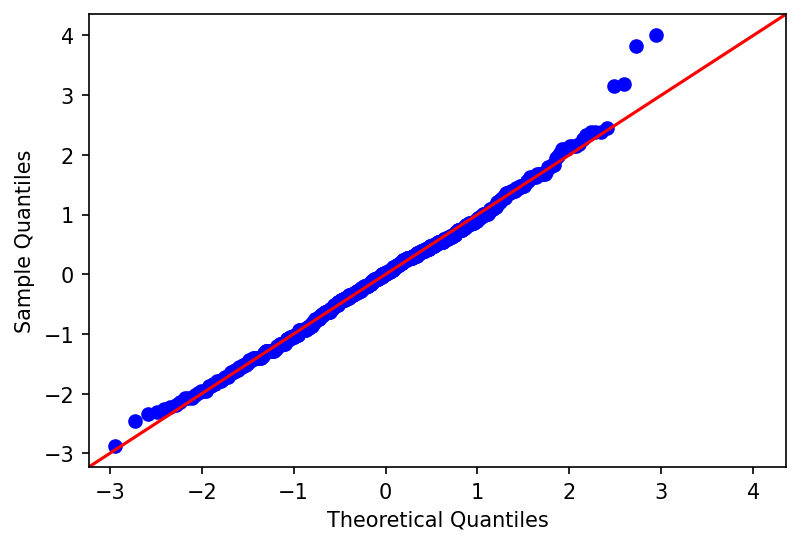

In [41]:
fig = sm.qqplot(s_df2['score'][s_df2['country'] == 1], stats.norm, 
                fit=True, line='45')

In [42]:
stat, p = stats.shapiro(s_df2['score'][s_df2['country'] == 2])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9970, p=0.6551


In [43]:
stat, p = stats.shapiro(s_df2['score'][s_df2['country'] == 3])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9944, p=0.0670


The populations are all normally distributed.

<h4>Check if the variances of all the populations tested are equal, by Bartlett’s Test test.

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$ <br>
$H_1$: At least two variances are different

In [44]:
stats.bartlett(s_df2['score'][s_df2['country'] == 1], 
               s_df2['score'][s_df2['country'] == 2], 
               s_df2['score'][s_df2['country'] == 3])

BartlettResult(statistic=10.938592097299118, pvalue=0.004214197704239352)

They all favor altenative hypothesis (p < 0.05). Thus, the variances of all the populations tested may not be totally equal.

<h4> The required conditions of the ANOVA test may not be satisfied, but we can still use it to have a rough concept of the population.

<h4>ANOVA Test for mean equality

Let $\mu_i$(1~3) be the average score in country US, Canada, UK, 

$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
$H_1$: At least two means differ

In [45]:
results = smf.ols('score ~ C(country)', data=s_df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(country),1.784109e+05,2.0,120.995739,1.660598e-49
Residual,1.126535e+06,1528.0,NaN,NaN


Since p-value = 1.660598e-49 < 0.05, there is sufficient evidence to reject $H_0$ in favor of $H_1$, which implies that at least one of the mean size is different from the others.

We can conclude that there are differences between the three countries.

<h2>Problem 14.57

In [46]:
import math as ms

k = 3

n1 = 10
n2 = 10
n3 = 10

MSE = 700

x1 = 128.7
x2 = 101.4
x3 = 133.7

a = 0.05

$H_0: \mu_1 = \mu_2$ <br>
$H_1: \mu_1 != \mu_2$

<h3>(a)

In [47]:
t = stats.t.ppf(1 - a / 2, (n1 + n2 + n3 - k))
LSD = t * ms.sqrt(MSE * (1 / 10 + 1 / 10))

print("LSD =", LSD)
print("|x1 - x2| =",abs(x1 - x2))
print("|x1 - x3| =",abs(x1 - x3))
print("|x2 - x3| =",abs(x2 - x3))

LSD = 24.277586073791696
|x1 - x2| = 27.299999999999983
|x1 - x3| = 5.0
|x2 - x3| = 32.29999999999998


|x1 - x2| > LSD, |x2 - x3| > LSD, which rejects $H_0$ in favor of $H_1$. So we conclude that x2 differ from x1 and x3 in the following problem.

<h3>(b)

In [48]:
c = k * (k - 1) / 2
a2 = a / c
t2 = stats.t.ppf(1 - a2 / 2, (n1 + n2 + n3 - k))
BA_LSD = t2 * ms.sqrt(MSE * (1 / 10 + 1 / 10))

print("BA_LSD =", BA_LSD)
print("|x1 - x2| =",abs(x1 - x2))
print("|x1 - x3| =",abs(x1 - x3))
print("|x2 - x3| =",abs(x2 - x3))

BA_LSD = 30.20109987627002
|x1 - x2| = 27.299999999999983
|x1 - x3| = 5.0
|x2 - x3| = 32.29999999999998


|x2 - x3| > BA_LSD, which rejects $H_0$ in favor of $H_1$. So we conclude that x2 differ from x3 in the following problem.

<h3>(c)

In [49]:
q = statsmodels.stats.libqsturng.qsturng(0.95, 3, 27)
o = q * ms.sqrt(MSE / 10)

print("omega =", o)
print("|x1 - x2| =",abs(x1 - x2))
print("|x1 - x3| =",abs(x1 - x3))
print("|x2 - x3| =",abs(x2 - x3))

omega = 29.331374947080647
|x1 - x2| = 27.299999999999983
|x1 - x3| = 5.0
|x2 - x3| = 32.29999999999998


|x2 - x3| > omega, which rejects $H_0$ in favor of $H_1$. So we conclude that x2 differ from x3 in the following problem.

<h2>Problem 14.65

In [50]:
# 讀取資料集
df1 = pd.read_excel('Xr14-65.xlsx')

# 簡單看一下資料集的樣子
# 如果這是你第一次使用這個資料集，使用Excel開啟資料集，並確認程式讀到的跟你在Excel中看到的一樣
print('Head of dataset:')
display(df1.head())

print("Tail of dataset:")
display(df1.tail())

Head of dataset:


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Small,Medium,Large
0,28,56,55
1,55,56,59
2,43,50,57
3,41,65,58
4,63,53,37


Tail of dataset:


,Small,Medium,Large
25,54,49,52
26,67,53,52
27,53,32,57
28,67,77,21
29,49,34,57


<h3>(a)

In [51]:
# wide_to_long假設同樣資料在不同因素下的名稱有相同的字頭，因此我們要改欄位名稱。
df1 = df1.rename(columns={'Small': 'time_1', "Medium": "time_2", "Large": "time_3"})
# 需要一個ID欄位
df1["id"] = df1.index
# 呼叫wide_to_long(); 文件請見: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html
df2 = pd.wide_to_long(df1, ["time"], sep="_", suffix='\w+', i="id", j="group").reset_index()

print("Head of data")
display(df2.head())
print("Tail of data")
display(df2.tail())

Head of data


,id,group,time
0,0,1,28
1,1,1,55
2,2,1,43
3,3,1,41
4,4,1,63


Tail of data


,id,group,time
85,25,3,52
86,26,3,52
87,27,3,57
88,28,3,21
89,29,3,57


<h4>Check if the populations are all normally distributed, by Shapiro-Wilk test.

Null Hypothesis: The distribution is normal. <br>
Alternative Hypothesis: The distribution is not normal.

In [52]:
stat, p = stats.shapiro(df2['time'][df2['group'] == 1])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9784, p=0.7815


In [53]:
stat, p = stats.shapiro(df2['time'][df2['group'] == 2])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9901, p=0.9916


In [54]:
stat, p = stats.shapiro(df2['time'][df2['group'] == 3])
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9343, p=0.0641


They all favor null hypothesis (p > 0.05). Thus, the populations are all normally distributed.

<h4>Check if the variances of all the populations tested are equal, by Bartlett’s Test test.

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2$ <br>
$H_1$: At least two variances are different

In [55]:
stats.bartlett(df2['time'][df2['group'] == 1], 
               df2['time'][df2['group'] == 2], 
               df2['time'][df2['group'] == 3])

BartlettResult(statistic=1.195779062552547, pvalue=0.5499711089724778)

They all favor null hypothesis (p > 0.05). Thus, the variances of all the populations tested are equal.

<h4> The required conditions of the ANOVA test are satisfied.

<h4>ANOVA Test for mean equality

Let $\mu_i$(1~3) be the average time in Small, Medium, Large, 

$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
$H_1$: At least two means differ

In [56]:
results = smf.ols('time ~ C(group)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(group),1178.022222,2.0,3.703723,0.028597
Residual,13835.800000,87.0,NaN,NaN


Since p-value = 0.028597 < 0.05, there is sufficient evidence to reject $H_0$ in favor of $H_1$, which implies that at least one of the mean size is different from the others.

We can conclude that speed of promotion varies between the three sizes of engineering firms.

<h3>(b)

$H_0: \mu_1 = \mu_2$ <br>
$H_1: \mu_1 != \mu_2$

In [57]:
mc = smm.MultiComparison(df2['time'], df2['group'])
print(mc.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     -3.8 0.4776 -11.5644 3.9644  False
     1      3  -8.8333 0.0217 -16.5977 -1.069   True
     2      3  -5.0333 0.2752 -12.7977  2.731  False
----------------------------------------------------


Group [1(Small), 3(Large)] rejects $H_0$ in favor of $H_1$. So we conclude that small firms differ from large firms. => v.